# MSDS 430 Module 9 Python Assignment 


<div class="alert alert-block alert-warning"><b>
This is a cumulative assignment that will put to use many of the Python skills you have learned this quarter. You will not be provided with TODO statements to guide you in completing each problem as was done with previous assignments. The intent is that you draw upon your knowledge from the course and complete each problem on your own without specific guidance on intermediate steps.
    
</b>
</div>

In [1]:
# https://www.maritime.dot.gov/data-reports/data-statistics/us-waterborne-foreign-container-trade-us-customs-ports-2000-%E2%80%93-2017

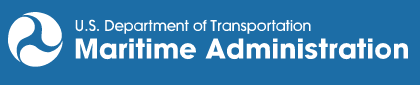

In [2]:
# load libraries
import pandas as pd
import numpy as np
 
# set output for zero decimals places and commas to denote thousands
pd.options.display.float_format = '{:,.2f}'.format

# allow multiple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-success">
<b> Problem 1: (3 points) </b> In Module 4 you learned how to use Pandas to read in different file types. Use Pandas to read the <mark>Import and Export tons.csv</mark> file provided into a dataframe called <mark>df</mark>. <br>

1. Read in the file.<br>
2. Display the columns in the file and the number of records.<br>
3. Display the first 10 records of your dataframe.

</div>

In [3]:
df = pd.read_csv('Import and Export tons.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   U.S. Custom Ports  1134 non-null   object 
 1   Coast              1134 non-null   object 
 2   Year               1134 non-null   int64  
 3   ImportTons         1134 non-null   float64
 4   ExportTons         1134 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 44.4+ KB


,U.S. Custom Ports,Coast,Year,ImportTons,ExportTons
0,"Aberdeen, WA",P,2000,0.00,0.00
1,"Anacortes, WA",P,2000,0.00,0.00
2,"Anchorage, AK",AK,2000,0.00,"11,414.60"
3,"Baltimore, MD",A,2000,"172,563.87","103,391.30"
4,"Baton Rouge, LA",G,2000,1.50,0.00
5,"Beaufort-Morehead City, NC",A,2000,0.00,26.07
6,"Beaumont, TX",G,2000,169.00,43.39
7,"Boston, MA",A,2000,"54,222.41","19,277.91"
8,"Brunswick, GA",A,2000,0.00,52.00
9,"Camden, NJ",A,2000,298.23,"6,247.76"


<div class="alert alert-block alert-success">
    <b> Problem 2: (5 points) </b> In module 5 you learned how to inspect fields within a dataframe. Use five separate cells to inspect each field in <mark>df</mark> so that you can become familiar with the data in each.
</div>

In [4]:
df['U.S. Custom Ports'].value_counts()

Aberdeen, WA        18
Port Manatee, FL    18
Newport News, VA    18
Norfolk, VA         18
Oakland, CA         18
                    ..
Long Beach, CA      18
Longview, WA        18
Los Angeles, CA     18
Mayaguez, PR        18
Wilmington, NC      18
Name: U.S. Custom Ports, Length: 63, dtype: int64

There are 63 US Custom Ports, and every port has 18 enties.

In [5]:
df['Coast'].value_counts()

A     468
G     288
P     270
PR     54
AK     36
HI     18
Name: Coast, dtype: int64

There are 6 Coasts in total

In [6]:
df['Year'] = df['Year'].astype('str')
df['Year'].value_counts()

2000    63
2001    63
2016    63
2015    63
2014    63
2013    63
2012    63
2011    63
2010    63
2009    63
2008    63
2007    63
2006    63
2005    63
2004    63
2003    63
2002    63
2017    63
Name: Year, dtype: int64

For each of the 18 years, there are 63 entries.

In [7]:
df['ImportTons'].describe()

count       1,134.00
mean      267,200.63
std       709,684.77
min             0.00
25%            53.76
50%        12,109.04
75%       120,907.93
max     4,590,451.38
Name: ImportTons, dtype: float64

Minimum of Imports is 0, and the maximum is 4,590,451.38

In [8]:
df['ExportTons'].describe()

count       1,134.00
mean      161,377.06
std       332,080.20
min             0.00
25%            35.06
50%         7,782.75
75%       103,493.19
max     1,953,606.60
Name: ExportTons, dtype: float64

Maximum of Exports is 0 and the maximum is 1,953,606.60

<div class="alert alert-block alert-success">
    <b> Problem 3: (3 points) </b> In Module 7, you learned how to create and work with dictionaries. As you look at the values in the dataframe, the <b>Coast</b> column contains abbreviations so let's create a data dictionary using the abbreviations as keys and the full names as values. After creating this dictionary, use it to add a new column in the <b>df</b> dataframe called <b>CoastName</b>.<br>
    
The abbreviations have the following meanings: P is Pacfic, A is Atlantic, G is Gulf, AK is Alaska, HI is Hawaii and PR is Puerto Rico. <br>
 
Demonstrate that the new column has been added by displaying the first five rows of <b>df</b>.
</div>

In [9]:
# Create the data dictionary
coast_dict = {
    'P': 'Pacific',
    'A': 'Atlantic',
    'G': 'Gulf',
    'AK': 'Alaska',
    'HI': 'Hawaii',
    'PR': 'Puerto Rico'
}

# Map abbreviations to their full names and add as a new column
df['CoastName'] = df['Coast'].map(coast_dict)

# Display the first five rows
df.head()

,U.S. Custom Ports,Coast,Year,ImportTons,ExportTons,CoastName
0,"Aberdeen, WA",P,2000,0.00,0.00,Pacific
1,"Anacortes, WA",P,2000,0.00,0.00,Pacific
2,"Anchorage, AK",AK,2000,0.00,"11,414.60",Alaska
3,"Baltimore, MD",A,2000,"172,563.87","103,391.30",Atlantic
4,"Baton Rouge, LA",G,2000,1.50,0.00,Gulf


<div class="alert alert-block alert-success">
<b> Problem 4: (2 points) </b> In Module 6 you learned how to drop a column from a dataframe. We no longer need the column called <i><b>Coast</b></i>, so drop it.  Demonstrate that your dataframe no longer has this column by displaying the first 5 rows.
</div>

In [10]:
# Drop the 'Coast' column
df.drop('Coast', axis=1, inplace=True)

# Display the first five rows to confirm the column has been removed
df.head()

,U.S. Custom Ports,Year,ImportTons,ExportTons,CoastName
0,"Aberdeen, WA",2000,0.00,0.00,Pacific
1,"Anacortes, WA",2000,0.00,0.00,Pacific
2,"Anchorage, AK",2000,0.00,"11,414.60",Alaska
3,"Baltimore, MD",2000,"172,563.87","103,391.30",Atlantic
4,"Baton Rouge, LA",2000,1.50,0.00,Gulf


<div class="alert alert-block alert-success">
<b> Problem 4: (4 points) </b> In Module 4 you learned about string manipulation.  You may need to do some further research, but the use of <mark>.slice</mark> and <mark>.split</mark> could be useful in this next answer.
    
Create two new columns in the <b>df</b> dataframe - from the U.S. Custom Ports column - create a <b>City</b> and a <b>State</b> column. It is okay to leave the State in the two letter abbreviation format. Neither the <b>City</b> nor the <b>State</b> should contain the comma from the U.S. Custom Ports field.<br>
    
Show your new columns by displaying the first five records of <b>df</b>.
</div>

In [11]:
# Split the 'U.S. Custom Ports' column
split_ports = df['U.S. Custom Ports'].str.split(',')

# Slice to get City and State
df['City'] = split_ports.str.slice(start=0, stop=1).str[0].str.strip()  # Get the first part (City) and strip any spaces
df['State'] = split_ports.str.slice(start=1, stop=2).str[0].str.strip()  # Get the second part (State) and strip any spaces

# Display the first five rows to see the new columns
df.head()

,U.S. Custom Ports,Year,ImportTons,ExportTons,CoastName,City,State
0,"Aberdeen, WA",2000,0.00,0.00,Pacific,Aberdeen,WA
1,"Anacortes, WA",2000,0.00,0.00,Pacific,Anacortes,WA
2,"Anchorage, AK",2000,0.00,"11,414.60",Alaska,Anchorage,AK
3,"Baltimore, MD",2000,"172,563.87","103,391.30",Atlantic,Baltimore,MD
4,"Baton Rouge, LA",2000,1.50,0.00,Gulf,Baton Rouge,LA


<div class="alert alert-block alert-success">
<b> Problem 6: (5 points) </b> In Module 5 you learned how to create a subset of a dataframe and to show the top values of a column.  <br><br>
    1. First create a new column in <b>df</b> called <b>`Difference`</b> that displays the difference in tons between imports and exports. Note that if a port had more imports than exports, the new Difference field will be positive. If the port had more export than imports, the new Difference field will be negative.<br>
    2. Create a new dataframe called <b>year2017</b> that only contains the 2017 data in <b>df</b>.  Use this dataframe to answer 3 - 5 below.<br>
3. Show the top three Ports with the most ImportTons for 2017.<br>
4. Show the top five States with the most cumulated ExportTons for 2017.<br>
5. Using the new Difference field, which ports in 2017 exported more than they imported?
</div>

In [12]:
# Adding the Difference to the dataframe
df['Difference'] = df['ImportTons'] - df['ExportTons']
# Creating the new dataframe for 2017
year2017 = df[df['Year'] == '2017']
# Getting the 3 ports with highest imports
top_import_ports = year2017.nlargest(3, 'ImportTons')[['U.S. Custom Ports', 'ImportTons']]
print('3 Ports with highest imports:', '\n', top_import_ports)
# Getting the 5 States with highest exports
top_export_states = year2017.groupby('State').sum().nlargest(5, 'ExportTons')['ExportTons']
print('\n','5 States with highest exports:', '\n', top_export_states)

3 Ports with highest imports: 
      U.S. Custom Ports   ImportTons
1099   Los Angeles, CA 4,590,451.38
1097    Long Beach, CA 3,792,165.13
1104      New York, NY 3,402,439.97

 5 States with highest exports: 
 State
CA   3,619,671.11
FL   1,445,359.58
NY   1,364,838.82
GA   1,300,583.17
TX     986,756.04
Name: ExportTons, dtype: float64


C:\Users\rites\AppData\Local\Temp\ipykernel_1204\2899150467.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_export_states = year2017.groupby('State').sum().nlargest(5, 'ExportTons')['ExportTons']


In [13]:
# Ports in 2017 that Exported More than they Imported:
export_more_than_import = year2017[year2017['Difference'] < 0][['U.S. Custom Ports', 'Difference']]
sorted_export_more_than_import = export_more_than_import.sort_values(by='Difference')
print(sorted_export_more_than_import)

         U.S. Custom Ports  Difference
1103       New Orleans, LA -186,438.97
1094      Jacksonville, FL -171,799.56
1131   West Palm Beach, FL -106,203.34
1116   Port Everglades, FL  -76,999.27
1133        Wilmington, NC  -27,913.04
1110         Pensauken, NJ  -27,351.27
1102            Mobile, AL  -14,380.60
1092          Honolulu, HI  -10,496.13
1085  Fernandina Beach, FL   -3,585.05
1087          Freeport, TX   -2,707.87
1122             Salem, NJ   -1,106.93
1095            Kodiak, AK   -1,002.00
1105      Newport News, VA     -892.92
1079         Brunswick, GA     -684.87
1115    Port Canaveral, FL     -180.96
1121        Portsmouth, NH      -86.25
1071          Aberdeen, WA       -1.75


<div class="alert alert-block alert-success">
<b> Problem 7: (6 points) </b> In Module 2 you learned about conditional statements and in Module 3 you learned about loops and user defined functions.<br>

- Write a function called <b>BestYears</b> that will accept <b>City</b> and <b>State</b> as arguments. 
- If the City does not appear in the dataframe, then the function should display the error message <mark>City does not exist</mark>.
- If the City appears but not with that State in the combo, then the function should display the error message <mark>Invalid Input</mark>.  
- If the City and State combo appears in the dataframe, then the function should display the City, State, Year, ImportTons, ExportTons and Difference sorted by Year with the oldest year showing first.<br>
    
**Use different cells to test your function with each of the following:**
1. Norfolk and VA - this should show output data
2. Norfolk and CA - this one should show the error message <mark>Invalid Input</mark>.
3. Python and MA - this one should show the error message <mark>City does not exist</mark>.
    

</div>

In [14]:
def BestYears(City, State):
    # Check if the City exists in the dataframe
    if City not in df['City'].values:
        print("City does not exist.")
        return

    # Filter the dataframe for the given City and State combo
    filtered_df = df[(df['City'] == City) & (df['State'] == State)]

    # Check if the combo exists
    if filtered_df.empty:
        print("Invalid Input.")
        return

    # If combo exists, sort by Year and display required columns
    sorted_df = filtered_df.sort_values(by='Year')
    columns_to_display = ['City', 'State', 'Year', 'ImportTons', 'ExportTons', 'Difference']
    print(sorted_df[columns_to_display])


In [15]:
BestYears('Norfolk', 'VA')

         City State  Year   ImportTons  ExportTons  Difference
35    Norfolk    VA  2000   437,522.50  412,877.64   24,644.86
98    Norfolk    VA  2001   454,216.30  431,175.96   23,040.34
161   Norfolk    VA  2002   551,168.00  430,838.77  120,329.23
224   Norfolk    VA  2003   633,455.09  459,751.91  173,703.18
287   Norfolk    VA  2004   717,346.35  488,687.22  228,659.13
350   Norfolk    VA  2005   780,917.57  543,589.39  237,328.18
413   Norfolk    VA  2006   834,197.96  579,727.70  254,470.26
476   Norfolk    VA  2007   857,702.55  727,528.43  130,174.12
539   Norfolk    VA  2008   811,381.80  783,293.55   28,088.25
602   Norfolk    VA  2009   677,798.37  698,141.44  -20,343.07
665   Norfolk    VA  2010   721,369.34  713,840.31    7,529.03
728   Norfolk    VA  2011   726,910.18  755,703.21  -28,793.03
791   Norfolk    VA  2012   817,486.37  829,063.36  -11,576.99
854   Norfolk    VA  2013   900,291.90  933,952.89  -33,660.99
917   Norfolk    VA  2014   981,188.98  950,356.95   30

In [16]:
BestYears('Norfolk', 'CA')

Invalid Input.


In [17]:
BestYears('Python', 'MA')

City does not exist.


<div class="alert alert-block alert-success">
<b> Problem 8: (5 points) </b> In Module 6 you learned how to create different types of visuals.  <br><br>

1. Create a visual of your choice to display `ExportTons` for every `Year` for five `ports`: Baltimore, MD, Wilmington, DE, Jacksonville, FL, New Orleans, LA and West Palm Beach, FL.
2. Make sure your visual has a title and both an x and y axis label.

</div>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'ExportTons for Selected Ports Over Years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'ExportTons')

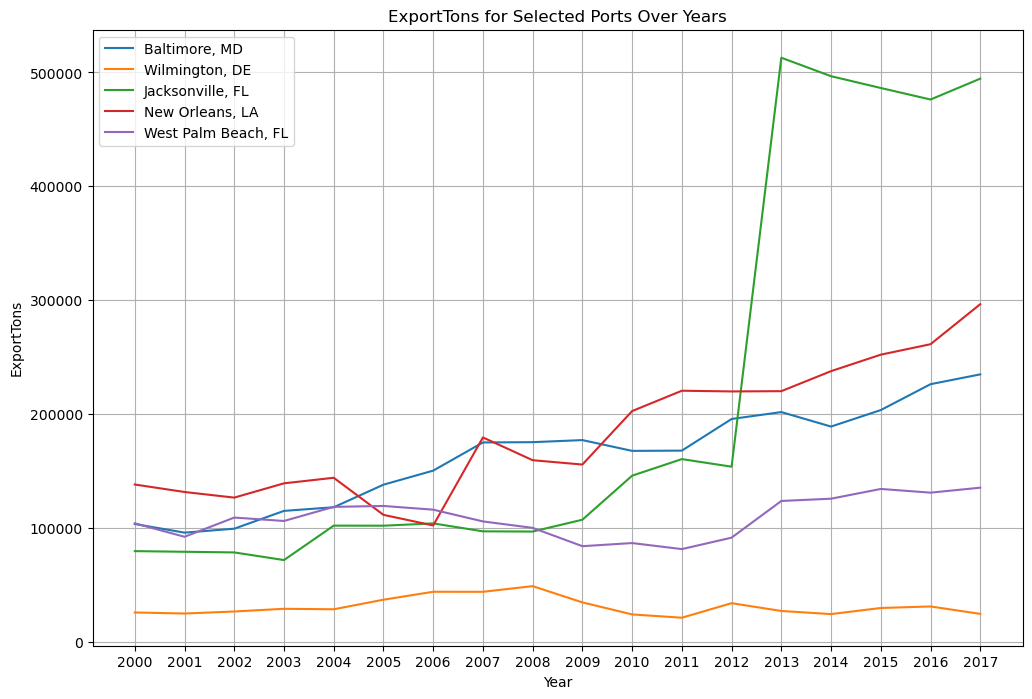

In [18]:
import matplotlib.pyplot as plt
# Define the ports of interest
ports_of_interest = [
    'Baltimore, MD',
    'Wilmington, DE',
    'Jacksonville, FL',
    'New Orleans, LA',
    'West Palm Beach, FL'
]

# Filter the dataframe for the specified ports
filtered_df = df[df['U.S. Custom Ports'].isin(ports_of_interest)]

# Pivot the dataframe
pivot_df = filtered_df.pivot(index='Year', columns='U.S. Custom Ports', values='ExportTons')

# Plot the data
plt.figure(figsize=(12, 8))
for port in ports_of_interest:
    plt.plot(pivot_df[port], label=port)

# Add title and labels
plt.title('ExportTons for Selected Ports Over Years')
plt.xlabel('Year')
plt.ylabel('ExportTons')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b> Problem 9: (1 point) </b> In a markdown cell, explain what your visual tells you about Jacksonville, FL between 2000 and 2017.


</div>

Stable Period (2000-2002): The exports begin relatively stable from 2000 to 2002 with minor reductions each year.

Decline (2003): A noticeable decline in exports occurs in 2003.

Significant Rise (2004-2005): The years 2004 and 2005 saw a significant surge in export tons, crossing 100,000.

Stability with Minor Fluctuations (2006-2009): From 2006 to 2009, the exports remain stable but with some minor fluctuations. There's a peak in 2009.

Rapid Increase (2010-2011): In 2010 and 2011, there's another significant increase.

Mild Decrease (2012): 2012 witnesses a slight reduction in the exports compared to the previous year.

Dramatic Surge (2013): 2013 experiences a dramatic surge in exports, exceeding 500,000 tons.

Stability with High Values (2014-2017): From 2014 onwards, the export values remain high, albeit with minor decreases in 2014, 2015, and 2016. There's a rebound in 2017, but it hasn't reached the peak of 2013.